In [1]:
%matplotlib inline
import keras
from keras import layers, models
from keras import backend
from keras.utils import np_utils
from keraspp.skeras import plot_acc, plot_loss
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/inswave/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/inswave/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/inswave/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/inswave/anaconda3/lib/python3.7/site-packages/t

In [2]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_class):
        super().__init__()
        self.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_class, activation='softmax'))
        self.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])
        #self.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta, metrics=['accuracy'])
        self.summary()

In [3]:
from keras import datasets
class DATA():
    def __init__(self):
        num_classes = 10
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

        print(x_train.shape)
        print(x_train.shape[1:])
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_rows)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_rows)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_rows, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_rows, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train = x_train / 255.0
        x_test = x_test / 255.0


        y_train = np_utils.to_categorical(y_train, num_classes)
        y_test = np_utils.to_categorical(y_test, num_classes)

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [4]:
epochs = 50
batch_size = 128

data = DATA()

model = CNN(data.input_shape, data.num_classes)
history = model.fit(data.x_train,data.y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
score = model.evaluate(data.x_test, data.y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(60000, 28, 28)
(28, 28)

Model: "cnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None,

KeyboardInterrupt: 

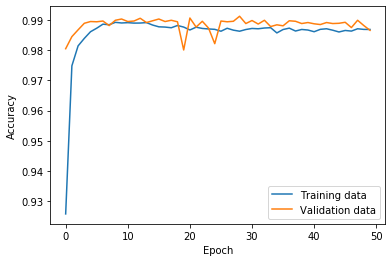

In [12]:
plot_acc(history)

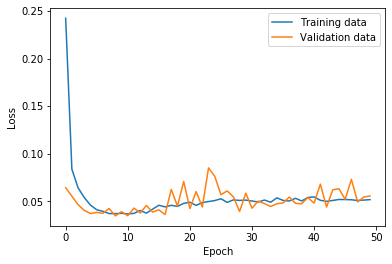

In [13]:
plot_loss(history)

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 853084116390608829
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13460822148918014511
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8620042201024146577
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3509321728
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11575415339522934435
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [5]:
import tensorflow
tensorflow.__version__

'1.14.0'

In [6]:
import keras
keras.__version__

'2.3.1'